# Orders

✏️ **Exercise**

Today, we will investigate the **orders**, and their associated **review score**.

For that purpose, we will create one single data table containing **all our orders with some engineered statistics for them as additional columns.**

👉 Our goal is to create a DataFrame with the following features:

*▸ It will become quite handy for our modeling phase -*


| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `order_id` 	| str 	| the id of the order 	|
| `wait_time` 	| float 	| the number of days between order_date and delivered_date 	|
| `expected_wait_time` 	| float 	| the number of days between order_date and estimated_delivery_date 	|
| `delay_vs_expected` 	| float 	| if the actual delivery date is later than the estimated delivery date, returns the number of days between the two dates, otherwise return 0 	|
| `order_status` 	| str 	| the status of the order 	|
| `dim_is_five_star` 	| int 	| 1 if the order received a five-star review, 0 otherwise 	|
| `dim_is_one_star` 	| int 	| 1 if the order received a one_star, 0 otherwise 	|
| `review_score` 	| int 	| from 1 to 5 	|
| `number_of_products` 	| int 	| number of products that the order contains 	|
| `number_of_sellers` 	| int 	| number of sellers involved in the order 	|
| `price` 	| float 	| total price of the order paid by customer 	|
| `freight_value` 	| float 	| value of the freight paid by customer 	|
| `distance_customer_seller` 	| float 	| the distance in km between customer and seller (optional) 	|  
  
⚠️ We also want to filter out "non-delivered" orders, unless explicitly specified, otherwise we cannot compute the potential delays.

❓ **Your challenge**: 

- Implement each feature as a separate method within the `Order` class available at `olist/order.py`
- Then, create a method `get_training_data()` that returns the complete DataFrame.

💡 Suggested methodology:
- Use the notebook below to write and test your code step-by-step first
- Then copy the code into `order.py` once you are certain of your code logic
- Focus on the data manipulation logic now, we will analyse the dataset visually in the next challenges

🔥 Notebook best practices (must-read) 👇

<details>
    <summary>▸ <i>click here</i></summary>

From now on, exploratory notebooks are going to become pretty long, and we strongly advise you to follow these notebook principles:
- Code your logic so that your Notebook can always be ran from top to bottom without crashing (Cell --> Run All)
- Name your variables carefully 
- Use dummy names such as `tmp` or `_` for intermediary steps when you know you won't need them for long
- Clear your code and merge cells when relevant to minimize Notebook size (`Shift-M`)
- Hide your cell output if you don't need to see it anymore (double-click on the red `Out[]:` section to the left of your cell).
- Make heavy use of jupyter nbextention `Collapsable Headings` and `Table of Content` (call a TA if you can't find them)
- Use the following shortcuts 
    - `a` to insert a cell above
    - `b` to insert a cell below
    - `dd` to delete a cell
    - `esc` and `arrows` to move between cells
    - `Shift-Enter` to execute cell and move focus to the next one
    - use `Shift + Tab` when you are between method brackets e.g. `groupby()` to get the docs! Repeat a few times to open it permanently

</details>





In [0]:
# Auto reload imported module everytime a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

In [0]:
# Import usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()
matching_table = olist.get_matching_table()

In [0]:
# What datasets do we have access to now ? 
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [0]:
# If nothing happens, your matching table has the correct shape
# Otherwise, try to debug first
# and if you are stuck for more than 15 minutes, raise a ticket with a TA

assert(matching_table.shape == (102230, 6))

## Code `order.py`

In [0]:
orders = data['orders'].copy() # good practice to be sure not to modify your `data` variable

In [0]:
assert(orders.shape == (99441, 8))

### `get_wait_time`
    Return a Dataframe with:
           order_id, wait_time, expected_wait_time, delay_vs_expected, order_status


<details>
    <summary>▸ Hints</summary>
    
- Don't forget to convert dates from "string" type to "pandas.datetime' using [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
- Take time to understand what python [`datetime`](https://docs.python.org/3/library/datetime.html) objects are 
</details>

🎁 We give you the pseudo-code below 👇 for this first method:

> 1. Inspect the `orders` dataframe
2. Filter the dataframe on `delivered orders`
3. Handle `datetime`
4. Compute `wait_time`
5. Compute `expected_wait_time`
6. Compute `delay_vs_expected`
7. Check the new dataframe 
8. Once you are satisfied with your code, you can carefully copy-paste it from the notebook to to `olist/order.py`

In [0]:
orders = data['orders'].copy()
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [0]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [0]:
# handle datetime
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [0]:
orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Length: 99441, dtype: timedelta64[ns]

In [0]:
# Compute just the number of days in each time_delta 
import datetime
one_day_delta = datetime.timedelta(days=1) # a "timedelta" object of 1 day
one_day_delta = np.timedelta64(24, 'h') # a "timedelta64" object of 1 day (use the one you prefer)

# Assign compute delay vs expected
orders.loc[:,'wait_time'] = \
    (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

orders.loc[:,'delay_vs_expected'] = \
    (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']) / one_day_delta

orders.loc[:,'expected_wait_time'] = \
    (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']) / one_day_delta

In [0]:
# There is a pandas method called dt.days to compute time differences
# But this is less interesting because it rounds time differences to days... but 8.9 days is worse than 8.1 days for instance
(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

0         8.0
1        13.0
2         9.0
3        13.0
4         2.0
         ... 
99436     8.0
99437    22.0
99438    24.0
99439    17.0
99440     7.0
Length: 99441, dtype: float64

In [0]:
# We could use pandas' built in .clip method to remove anything below 0
# orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].clip(0)

# Or write a custom function and apply it to the column
def handle_delay(x):
    if x > 0:
        return x
    else:
        return 0

orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].apply(handle_delay)

In [0]:
orders[['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected']]

,order_id,wait_time,expected_wait_time,delay_vs_expected
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0


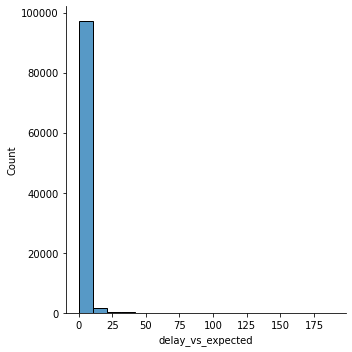

In [0]:
sns.displot(orders['delay_vs_expected'])

👀 Check the dataframe you've just created. <br/> 

💪 When your code works, commit it to `olist/order.py` <br/>

🙏 Now, test it by running the following cell 👇 

In [0]:
# Test your code here
from olist.order import Order
Order().get_wait_time()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered


In [0]:
assert(Order().get_wait_time().shape == (96478, 5))

### `get_review_score`
     Returns a DataFrame with:
        order_id, dim_is_five_star, dim_is_one_star, review_score

👉 Load the `reviews`

In [0]:
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [0]:
reviews = data['order_reviews'].copy()
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [0]:
assert(reviews.shape == (99224,7))

👉 Let's create two functions `dim_five_star` and `dim_one_star`  
    We will apply them  `element_wise` to the `review_score` column in the next cell below.

In [0]:
def dim_five_star(d):
    # $CHALLENGIFY_BEGIN
    if d == 5:
        return 1
    else:
        return 0
    # $CHALLENGIFY_END


def dim_one_star(d):
    # $CHALLENGIFY_BEGIN
    if d == 1:
        return 1
    else:
        return 0
    # $CHALLENGIFY_END

👉 Use these functions to create two boolean features `dim_is_five_star` and `dim_is_one_star`

In [0]:
reviews["dim_is_five_star"] = reviews["review_score"].map(dim_five_star) # --> Series([0, 1, 1, 0, 0, 1 ...])
reviews["dim_is_one_star"] = reviews["review_score"].map(dim_one_star) # --> Series([0, 1, 1, 0, 0, 1 ...])

In [0]:
reviews[["order_id", "dim_is_five_star", "dim_is_one_star", "review_score"]]

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


Once again, 

👀 Check the dataframe you've just created. <br/> 

💪 When your code works, commit it to `olist/order.py` <br/>

🙏 Now, test it by running the following cell 👇 

In [0]:
# Test your code here
from olist.order import Order
Order().get_review_score()

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


In [0]:
assert(Order().get_review_score().shape == (99224, 4))

#### Check your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('reviews',
    dim_five_star=dim_five_star(5),
    dim_not_five_star=dim_five_star(3),
    dim_one_star=dim_one_star(1),
    dim_not_one_star=dim_one_star(2)
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /Users/davywai/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/davywai/code/lewagon/data-solutions/04-Decision-Science/02-Statistical-Inference/01-Orders
plugins: dash-1.20.0, anyio-3.2.1
collecting ... collected 4 items

tests/test_reviews.py::TestReviews::test_dim_five_star PASSED            [ 25%]
tests/test_reviews.py::TestReviews::test_dim_not_five_star PASSED        [ 50%]
tests/test_reviews.py::TestReviews::test_dim_not_one_star PASSED         [ 75%]
tests/test_reviews.py::TestReviews::test_dim_one_star PASSED             [100%]

============================== 4 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/reviews.pickle

git commit -m 'Completed reviews step'

git push origin master


### `get_number_products`:
     Returns a DataFrame with:
        order_id, number_of_products (total number of products per order)

In [0]:
data["order_items"].groupby("order_id").count()\
.rename(columns={"order_item_id": "number_of_products"})\
.sort_values("number_of_products")[['number_of_products']]

,number_of_products
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
a6e9d106235bcf1dda54253686d89e99,1
a6e9b80a7636eb8dd592dbb3e20d0a91,1
a6e963c11e80432334e984ead4797a8b,1
a6e8ad5db31e71f5f12671af561acb4a,1
...,...
428a2f660dc84138d969ccd69a0ab6d5,15
9ef13efd6949e4573a18964dd1bbe7f5,15
1b15974a0141d54e36626dca3fdc731a,20


👉 Same routine: 
* check your dataframe, 
* commit your code to `olist/order.py`
* and check that it truly works.

In [0]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_number_products()

,order_id,number_of_products
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


In [0]:
assert(Order().get_number_products().shape == (98666, 2))

### `get_number_sellers`:
     Returns a DataFrame with:
        order_id, number_of_sellers (total number of unique sellers per order)
        
<details>
    <summary>▸ <i>Hint</i></summary>

`pd.Series.nunique()`
</details>

In [0]:
sellers = \
    data['order_items']\
    .groupby('order_id')['seller_id'].nunique().reset_index()

sellers.columns = ['order_id', 'number_of_sellers']
sellers.sort_values('number_of_sellers')

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
65559,aaaf314a8cf0d0da71e52c6cd4184cbd,1
65558,aaaea350ff8a957595f3c631d6b63d1b,1
65557,aaae80f5b6239bd9e1b22e9aa542c3e8,1
65556,aaabf43feb9498d9de4588eb73231c25,1
...,...,...
11231,1d23106803c48c391366ff224513fb7f,4
53796,8c2b13adf3f377c8f2b06b04321b0925,4
55847,91be51c856a90d7efe86cf9d082d6ae3,4
79967,cf5c8d9f52807cb2d2f0a0ff54c478da,5


In [0]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_number_sellers()

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


In [0]:
assert(Order().get_number_sellers().shape == (98666,2))

### `get_price_and_freight`
     Returns a DataFrame with:
        order_id, price, freight_value

<details>
    <summary>▸ <i>Hint</i></summary>

`pd.Series.agg()` allows you to apply one transformation method per column of your groupby object
</details>

In [0]:
price_freight = \
    data['order_items']\
    .groupby('order_id',
             as_index=False).agg({'price': 'sum',
                                  'freight_value': 'sum'})
price_freight

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


In [0]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_price_and_freight()

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


In [0]:
assert(Order().get_price_and_freight().shape == (98666,3))

### `get_distance_seller_customer` 
**(OPTIONAL - Try  to code this function only after finishing today's challenges - Skip to next section)**

    Returns a Dataframe with:
        [order_id, distance_seller_customer] 
               (the distance in km between customer and seller)

💡Have a look at the `haversine_distance` formula we coded for you in the `olist.utils` module

In [0]:
# YOUR CODE HERE

👉 Load the `customers` and the `sellers` datasets.

In [0]:
# Select sellers and customers 
sellers = data['sellers']
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [0]:
customers = data['customers']
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


👉 Load the `geolocation` dataset and clean it up if necessary.

In [0]:
# Select geo dataset
geo = data['geolocation'].sort_values(by='geolocation_zip_code_prefix')
geo.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1246,1001,-23.549292,-46.633559,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
1182,1001,-23.549779,-46.633957,sao paulo,SP
1435,1001,-23.549292,-46.633559,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP


In [0]:
# Warning: Since one zipcode can map to multiple [lat, lng], we take the first one
geo = geo.groupby('geolocation_zip_code_prefix', as_index=False).first()

🔥 Perform the necessary `merge` operations: 
* `geo_location` x `sellers`
* `geo_location` x `customers`

🚀 Use our `haversine_distance` function that you can find in `olist/utils.py` to computer the `seller-customer distance`

👉 Merge `geo_location` x `sellers`

In [0]:
sellers_mask_columns = ['seller_id', 'seller_zip_code_prefix', 'seller_city', 
                        'seller_state', 'geolocation_lat', 'geolocation_lng']
sellers_geo = sellers.merge(geo,
                            how='left',
                            left_on='seller_zip_code_prefix',
                            right_on='geolocation_zip_code_prefix')[sellers_mask_columns]
sellers_geo.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.884842,-47.045901
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.380142,-46.947588
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.907297,-43.174692


👉 Merge `geo_location` x `customers`

In [0]:
customers_mask_columns = ['customer_id', 'customer_zip_code_prefix', 'customer_city', 
                          'customer_state', 'geolocation_lat', 'geolocation_lng']
customers_geo = customers.merge(geo,
                            how='left',
                            left_on='customer_zip_code_prefix',
                            right_on='geolocation_zip_code_prefix')[customers_mask_columns]
customers_geo.head(3)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.483960,-47.403324
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,-23.730435,-46.537419
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,-23.529547,-46.658302


🎯 Now that we have the coordinates of both the sellers and customers, let's store them in the `matching_table`. 

💡 By doing this, we will be able to compute the `seller-customer distance`

👉 Inserting the `sellers' coordinates` in the matching_table

In [0]:
matching_geo_sellers = matching_table.merge(sellers_geo, on='seller_id')
matching_geo_sellers.head(3)

,customer_id,order_id,review_id,product_id,seller_id,number_of_products,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,be1b70680b9f9694d8c70f41fa3dc92b,1b15974a0141d54e36626dca3fdc731a,be332150a9c96e68c9565ea53cba2355,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,20,12233,sao jose dos campos,SP,-23.25695,-45.889196
1,e2f063c52fa92b54f186c62b90699c10,a483ffe0ce133740ab12ebcba8a3ccf9,989d6baa4f2f2dc2c03dda1daef5a6e1,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,10,12233,sao jose dos campos,SP,-23.25695,-45.889196
2,19d04e5c06403cf04a62edc4f1ded818,a9fb450008d4a94311a7288937b880e6,74b70fca2be61f4bd1b016aa2c3666a7,70906e04da1eebf3d1b8791bd09ffe85,8e6d7754bc7e0f22c96d255ebda59eba,5,12233,sao jose dos campos,SP,-23.25695,-45.889196


👉 Inserting the `customers' coordinates` in the matching_table

In [0]:
matching_geo_sellers_customers = matching_geo_sellers.merge(customers_geo, 
                                                            on='customer_id', 
                                                            suffixes=('_seller', '_customer'))
matching_geo_sellers_customers[
    ['seller_id', 'geolocation_lat_seller','geolocation_lng_seller',
    'customer_id', 'geolocation_lat_customer', 'geolocation_lng_customer']
].head(3)

,seller_id,geolocation_lat_seller,geolocation_lng_seller,customer_id,geolocation_lat_customer,geolocation_lng_customer
0,8e6d7754bc7e0f22c96d255ebda59eba,-23.25695,-45.889196,be1b70680b9f9694d8c70f41fa3dc92b,-23.528716,-46.620265
1,8e6d7754bc7e0f22c96d255ebda59eba,-23.25695,-45.889196,e2f063c52fa92b54f186c62b90699c10,-20.725445,-48.058471
2,8e6d7754bc7e0f22c96d255ebda59eba,-23.25695,-45.889196,19d04e5c06403cf04a62edc4f1ded818,-29.918366,-51.100418


ℹ️ The shape should be 103027 x 15. Please double-check.

In [0]:
matching_geo_sellers_customers.shape

(102230, 16)

Do we have missing values ❓

In [0]:
matching_geo_sellers_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102230 entries, 0 to 102229
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               102230 non-null  object 
 1   order_id                  102230 non-null  object 
 2   review_id                 102230 non-null  object 
 3   product_id                102230 non-null  object 
 4   seller_id                 102230 non-null  object 
 5   number_of_products        102230 non-null  int64  
 6   seller_zip_code_prefix    102230 non-null  int64  
 7   seller_city               102230 non-null  object 
 8   seller_state              102230 non-null  object 
 9   geolocation_lat_seller    102002 non-null  float64
 10  geolocation_lng_seller    102002 non-null  float64
 11  customer_zip_code_prefix  102230 non-null  int64  
 12  customer_city             102230 non-null  object 
 13  customer_state            102230 non-null  o

* Some rows for `sellers_geo` and `customers_geo` are _NULL_ due to left outer joins. <br/>
$\rightarrow$ Let's remove them with `dropna()`

In [0]:
matching_geo_sellers_customers.dropna(inplace = True)

🚚 It's time to add the `seller-customer distance` to our dataframe !

🎁 Use the `haversine_distance` function we coded for you in `olist/utils.py`



In [0]:
from olist.utils import haversine_distance
print(haversine_distance.__doc__)


    Compute distance between two pairs of coordinates (lon1, lat1, lon2, lat2)
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    


In [0]:
matching_geo_sellers_customers["distance_seller_customer"] = matching_geo_sellers_customers.apply(
    lambda row: haversine_distance(
        row["geolocation_lng_seller"],
        row["geolocation_lat_seller"],
        row["geolocation_lng_customer"],
        row["geolocation_lat_customer"],
    ),
    axis=1,
)

In [0]:
matching_geo_sellers_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101717 entries, 0 to 102229
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               101717 non-null  object 
 1   order_id                  101717 non-null  object 
 2   review_id                 101717 non-null  object 
 3   product_id                101717 non-null  object 
 4   seller_id                 101717 non-null  object 
 5   number_of_products        101717 non-null  int64  
 6   seller_zip_code_prefix    101717 non-null  int64  
 7   seller_city               101717 non-null  object 
 8   seller_state              101717 non-null  object 
 9   geolocation_lat_seller    101717 non-null  float64
 10  geolocation_lng_seller    101717 non-null  float64
 11  customer_zip_code_prefix  101717 non-null  int64  
 12  customer_city             101717 non-null  object 
 13  customer_state            101717 non-null  o

💡 Always keep it in mind to double-check your results:
* Select 3 random rows of `matching_geo_sellers_customers` and look at the computed distance
* Compare it with what Google Maps says

In [0]:
matching_geo_sellers_customers.sample(3)[['seller_city', 
                        'customer_city', 
                        'distance_seller_customer']]

,seller_city,customer_city,distance_seller_customer
22266,ribeirao preto,rio de janeiro,487.331655
38971,sao paulo,sao paulo,15.468232
13210,araguari,piumhii,309.069979


👉 Let's quickly check the distribution of the distance seller-customer :)

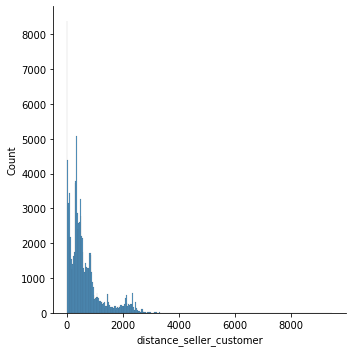

In [0]:
 sns.displot(data = matching_geo_sellers_customers, x ='distance_seller_customer')

👉 What is the median seller-customer distance ?

In [0]:
matching_geo_sellers_customers['distance_seller_customer'].describe()

count    101717.000000
mean        599.960592
std         594.489197
min           0.000000
25%         186.743627
50%         433.406798
75%         796.881021
max        9475.172387
Name: distance_seller_customer, dtype: float64

⚠️ Since an order can have multiple sellers, inspect the average seller-customer distance per order.

In [0]:
average_order_distance = matching_geo_sellers_customers.groupby("order_id", as_index=False).agg(
    {"distance_seller_customer": "mean"}
)
average_order_distance

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,300.596556
1,00018f77f2f0320c557190d7a144bdd3,589.759782
2,000229ec398224ef6ca0657da4fc703e,312.805797
3,00024acbcdf0a6daa1e931b038114c75,293.638497
4,00042b26cf59d7ce69dfabb4e55b4fd9,647.398281
...,...,...
97425,fffc94f6ce00a00581880bf54a75a037,2754.654908
97426,fffcd46ef2263f404302a634eb57f7eb,354.781786
97427,fffce4705a9662cd70adb13d4a31832d,338.757963
97428,fffe18544ffabc95dfada21779c9644f,74.917511


In [0]:
average_order_distance.describe()

,distance_seller_customer
count,97430.000000
mean,601.480057
std,596.618152
min,0.000000
25%,186.395559
50%,433.616335
75%,798.056495
max,9475.172387


👀 Check your new dataframe and commit your code to olist/order.py when it works. 

In [0]:
Order().get_distance_seller_customer()

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
...,...,...
97425,fffc94f6ce00a00581880bf54a75a037,2755.314485
97426,fffcd46ef2263f404302a634eb57f7eb,354.848852
97427,fffce4705a9662cd70adb13d4a31832d,338.827218
97428,fffe18544ffabc95dfada21779c9644f,72.870476


# Test your newly coded module

❓ Time to code `get_training_data` making use of your previous coded methods.

In [0]:
from olist.order import Order
from nbresult import ChallengeResult
data = Order().get_training_data()
result = ChallengeResult('training',
    shape=data.shape,
    columns=sorted(list(data.columns))
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /Users/davywai/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/davywai/code/lewagon/data-solutions/04-Decision-Science/02-Statistical-Inference/01-Orders
plugins: dash-1.20.0, anyio-3.2.1
collecting ... collected 2 items

tests/test_training.py::TestTraining::test_training_data_columns PASSED  [ 50%]
tests/test_training.py::TestTraining::test_training_data_shape PASSED    [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/training.pickle

git commit -m 'Completed training step'

git push origin master


🏁 Congratulations! 

💾 Commit and push your notebook before starting the next challenge.